# Datafun 06 Project

Jacob Sellinger

The goal of this project is to just briefly examine a CSV file with 100,000 different companies. The data is rather basic and we only expect to find basic trends and getting familiar with how to work with the data in different formats.

In [4]:
# Need to import the modules first - using the common import name

import numpy as np
import pandas as pd
import pyarrow
import matplotlib as plt
import seaborn as sn
import plotly as pt


## Data Acquisition

Our first step after importing the modules we need is to acquire the data from the data folder and transpose it onto a data frame. Pandas works best with and pandas data frame.

In [15]:
# Import data frame from the csv file into a data frame
df = pd.read_csv("C:\Projects\datafun-06-eda\datafun-06-eda\data\organizations-100000.csv")


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\jacob\AppData\Local\Temp\ipykernel_13996\3593766844.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("C:\Projects\datafun-06-eda\datafun-06-eda\data\organizations-100000.csv")


## Initial Data Inspection

We have just loaded the data into a data frame so now we need to get a feel for what the data actually looks like - we often do not need to or even want to look at the dataset itself. Sometimes we may be unable to, especially with unstructured data. In our case, it is structured but to get a brief overview we may want to get the following items: The shape of the data frame, the data types of each column, and a small sample.

In [17]:
# This will print the first 10 rows of data - this is our sample
print(df.head(10))

   Index  Organization Id                          Name  \
0      1  8cC6B5992C0309c                   Acevedo LLC   
1      2  ec094061FeaF7Bc                Walls-Mcdonald   
2      3  DAcC5dbc58946A7                   Gregory PLC   
3      4  8Dd7beDa37FbeD0      Byrd, Patterson and Knox   
4      5  a3b5c54AEC163e4              Mcdowell-Hopkins   
5      6  fDfEBeFDaEb59Af               Hayden and Sons   
6      7  752ef90Eae1f7f5                    Castro LLC   
7      8  B1D4c5CA34f9992       Barajas, Baird and Shaw   
8      9  Cfa1a44106faD4B  Lucas, Galloway and Benjamin   
9     10  C08fcf292AB17DF   Barker, Hubbard and Bennett   

                         Website                        Country  \
0       https://www.donovan.com/  Holy See (Vatican City State)   
1       http://arias-willis.net/                      Lithuania   
2   http://www.lynch-hoover.net/                        Tokelau   
3   https://www.james-velez.net/                    Netherlands   
4            ht

In [ ]:
#This will give us the size of the array of the data by returning the (rows, columns)
print(df.shape)

(100000, 9)


In [18]:
# This will give us the type of data is in each column
print(df.dtypes)

Index                   int64
Organization Id        object
Name                   object
Website                object
Country                object
Description            object
Founded                 int64
Industry               object
Number of employees     int64
dtype: object


## Initial Descriptive Statistics

Great! Now that we have a rough idea of what the data looks like we should now get a feel for the data - given that our data is mostly objects or categorical we may find it hard to run descriptive statistics on it.

We can run the initial descriptive statistics on the integer values for the year founded and the number of e,ployees to get some insight into the data.

In [32]:
# These describe the basic statistics of a certain column in each data frame

df[["Founded","Number of employees"]].describe()

,Founded,Number of employees
count,100000.000000,100000.000000
mean,1995.735170,5003.959280
std,15.097952,2889.465063
min,1970.000000,1.000000
25%,1983.000000,2508.000000
50%,1996.000000,4998.000000
75%,2009.000000,7503.000000
max,2022.000000,9999.000000


Given the above we find a few interesting points:

1. Our data set is limited to companies founded between 1970-2022
2. The median company was founded in 1996
3. The lowest employee count is 1 - which is likely safe to assume is a single founder
4. The maximum number of employees is 9999 which usually comes with the caveat that it means there are 9999 or more employees

The main conclusions we should draw from these descriptive statistics is that we are limited in analysis capabilities to a certain time span, therefore we are likely leaving out some very important companies. For example, IBM was founded in 1911, over a century ago and Chase Bank, now part of JPMorgan was founded in 1799. However, this data set might likely include a lot of important companies founded in the 21st century such as tech companies.

## Initial Data Visualization for Categorical and Numerical Columns

Now that we have some basis for what data we are working with and the limitations we can look a little bit closer at some other important features such as geography 


<Axes: xlabel='Country'>

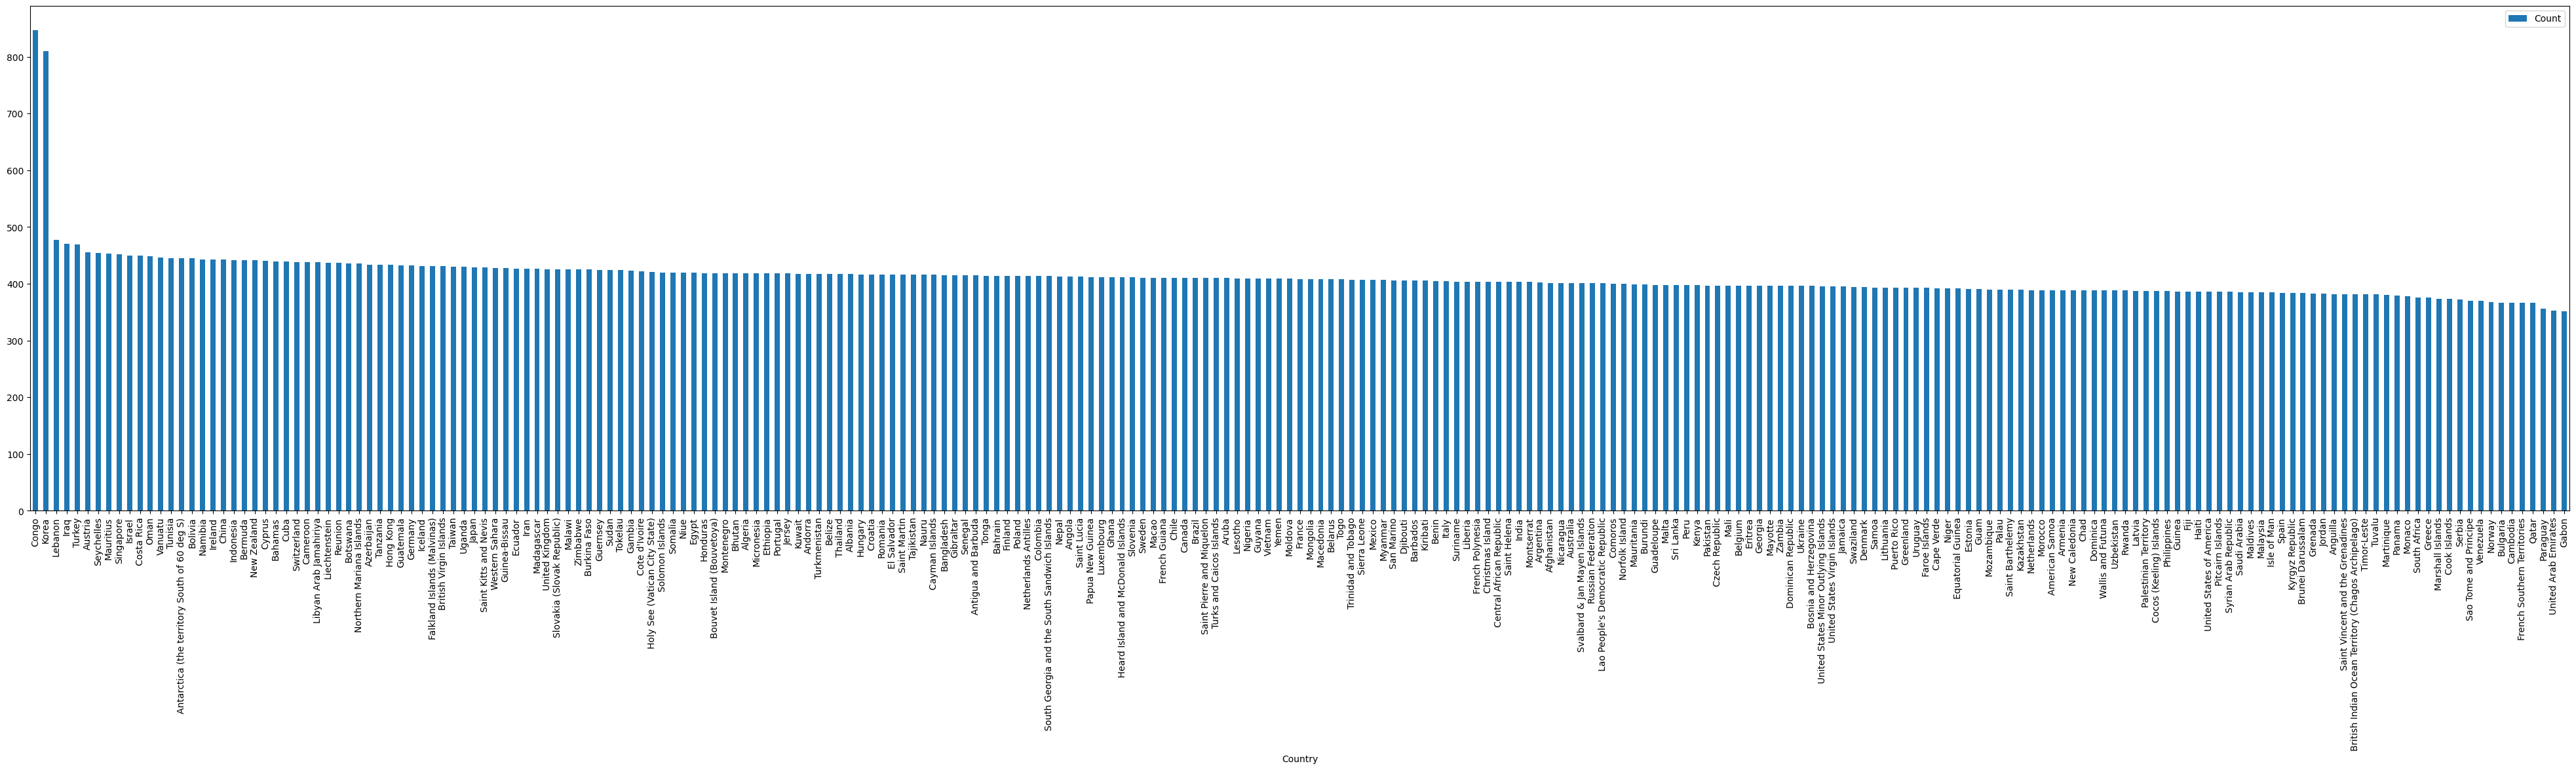

In [44]:
# We want to fidn the number of companies by country so we need to manipulate our data a bit

country_count = df["Country"].value_counts().reset_index() #Counting the number of countries then resetting the data frame into a new one
country_count.columns = ["Country", "Count"] # This renames the data frame columns for clarity

# Use a barchart from plotly to graph it

country_count.plot(x="Country", y="Count", kind='bar',figsize=(50,10))


The initial data visualization requires some data manipulation but what we see is that this data set appears to represent a large swath of companies, except a large proportion coming from two countries: the Congo and Korea

This may 